<a href="https://colab.research.google.com/github/DattatreyaReddy/spark_internship/blob/main/data_science_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation**
## *Graduate Rotational Internship Program*

---

### *Data Science & Business Analytics Internship*

---

**Intern Name : Panta DattatreyaReddy**




### Prediction using Supervised ML (Level - Beginner)

- Predict the percentage of an student based on the no. of study hours.
- This is a simple linear regression task as it involves just 2 variables.
- You can use R, Python, SAS Enterprise Miner or any other tool
- Data can be found at http://bit.ly/w-data
- What will be predicted score if a student studies for 9.25 hrs/ day?
- Sample Solution : https://bit.ly/2HxiGGJ


### Solution

#### Import required modules

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, random_split
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

#### Download and Explore the Data
- Download the `csv` data file from give url
- Convert the `.csv` file into a `pandas.DataFrame`

In [2]:
url = 'http://bit.ly/w-data'
stud_data = pd.read_csv(url)
print ('Data Imported successfully')
print('Size of the Dataset' , stud_data.shape)
stud_data.head()

Data Imported successfully
Size of the Dataset (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


- Plot a graph to understand the data better.

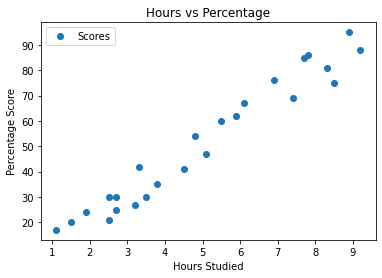

In [3]:
stud_data.plot(x = 'Hours',y = 'Scores', style= 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### Preparing the data
- Shuffle the data to select data from all parts of the dataset.
- Then convert the Dataset from `pandas.DataFrame` to `pytorch.tensors`.
- Convert all the data into `float32`.
- Also split the data into inputs and targets.

In [4]:
stud_data = stud_data.sample(frac=1).reset_index(drop=True)
X = stud_data.iloc[:,:-1]
Y = stud_data.iloc[:,1:]
inputs = torch.from_numpy(X.to_numpy(dtype='float32'))
targets = torch.from_numpy(Y.to_numpy(dtype='float32'))

- Split the data into train set and test set.
- To check if out model is over fitting.

In [5]:
x_train = inputs[:20]
y_train = targets[:20]
x_test = inputs[20:]
y_test = targets[20:]

#### Declare the Training Model
- Declare input and output sizes of our model

In [6]:
input_size = 1
output_size = 1

- We will use `torch.nn.Linear` as our model 

In [7]:
model = nn.Linear(input_size,output_size)

- Pytorch will assign weights and bias randomly 

In [17]:
list(model.parameters())

[Parameter containing:
 tensor([[10.1273]], requires_grad=True), Parameter containing:
 tensor([0.8786], requires_grad=True)]

- We will use `Mean Squared Error` as loss function
- We also use `Stochastic Gradient Descent` with learning rate of `1e-2` as our optimizer.

In [9]:
loss_fun = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 1e-2)

#### Training the Model and Calculate the Train loss

In [10]:
epochs = 500
for epoch in range(epochs):

  y_pred = model(x_train)
  loss = loss_fun(y_pred,y_train)
  if epoch % 100 == 99:
    print (epoch, loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
print('Total Loss after {} epochs is {:.3f}'.format(epochs,float(loss)))

99 30.114273071289062
199 29.938064575195312
299 29.85068130493164
399 29.807348251342773
499 29.78586196899414
Total Loss after 500 epochs is 29.786


#### Calculate the Test loss

In [11]:
y_pred = model(x_test)
loss = loss_fun(y_pred,y_test)
print(pd.DataFrame({'Actual': list(map(int,y_test)),'Predicted': list(map(int,y_pred))},index=[1,2,3,4,5]))
print('loss : {:.3f}'.format(float(loss)))

   Actual  Predicted
1      42         34
2      81         84
3      35         39
4      88         94
5      20         16
loss : 29.173


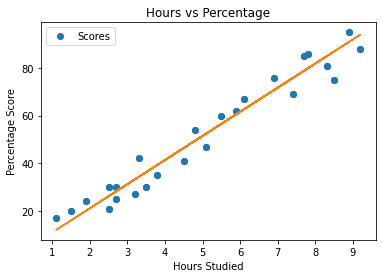

In [12]:
    stud_data.plot(x = 'Hours',y = 'Scores', style= 'o')
    plt.title('Hours vs Percentage')
    plt.xlabel('Hours Studied')
    plt.ylabel('Percentage Score')
    line = (model.weight.detach().numpy())*X + (model.bias.detach().numpy()) 
    plt.scatter(X, Y)
    plt.plot(X, line);
    plt.show()
    plt.close()

#### Make Predictions

##### What will be predicted score if a student studies for 9.25 hrs/ day? 

In [13]:
hours = 9.25

In [14]:
score = model(torch.tensor([hours]))

In [15]:
print('Prediction for given input is {:.2f}'.format(float(score)))
print ('The percentage a student can score by reading for {} hours is {}'.format(hours,int(score)))

Prediction for given input is 94.56
The percentage a student can score by reading for 9.25 hours is 94


### The percentage a student can score by reading for **9.25** hours is **94**